In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import math

import scipy.stats as sps

import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn


d1 = pd.read_csv('coursework_1_data_2019.csv')
d1 = d1.loc[d1['region']=='London']
d1['cases2008per100000'] = (d1['2008_cases_total']/d1['2008_pop_total'])*100000
d1['cases2013per100000'] = (d1['2013_cases_total']/d1['2013_pop_total'])*100000
d1['cases2018per100000'] = (d1['2018_cases_total']/d1['2018_pop_total'])*100000
d1['overallcaseschange'] = d1['cases2018per100000'] - d1['cases2008per100000']
d1['Percentagecasechange'] = d1['overallcaseschange']/d1['cases2008per100000'] *100
d1['overallpopchange'] = d1['2018_pop_total'] - d1['2008_pop_total']
d1['Percentagepopchange'] = d1['overallpopchange']/d1['2008_pop_total'] *100
d1['logpopchange'] = np.log10(d1['2018_pop_total'])-np.log10(d1['2013_pop_total'])
d1['logcasechange'] = np.log10(d1['2018_cases_total'])-np.log10(d1['2013_cases_total'])
d1['MeanPopulation'] = (d1['2008_pop_total']+d1['2013_pop_total']+d1['2018_pop_total'])/3
d1['budgetper100000'] = d1['total_budget']/d1['MeanPopulation'] *100000
d1['budgetperperson'] = d1['total_budget']/d1['MeanPopulation']
d1['averageyearlycasechange'] = (d1['cases2018per100000'] - d1['cases2008per100000'])/10
d1['averagemalepop'] = (d1['2008_pop_male']+d1['2013_pop_male']+d1['2018_pop_male'])/3
d1['malecases2008per100000'] = (d1['2008_cases_male']/d1['2008_pop_male'])*100000
d1['malecases2013per100000'] = (d1['2013_cases_male']/d1['2013_pop_male'])*100000
d1['malecases2018per100000'] = (d1['2018_cases_male']/d1['2018_pop_male'])*100000
d1['averageyearlymalecasechange'] = (d1['malecases2018per100000'] - d1['malecases2008per100000'])/10
d1['averagefemalepop'] = (d1['2008_pop_female']+d1['2013_pop_female']+d1['2018_pop_female'])/3
d1['femalecases2008per100000'] = (d1['2008_cases_female']/d1['2008_pop_female'])*100000
d1['femalecases2013per100000'] = (d1['2013_cases_female']/d1['2013_pop_female'])*100000
d1['femalecases2018per100000'] = (d1['2018_cases_female']/d1['2018_pop_female'])*100000
d1['averageyearlyfemalecasechange'] = (d1['femalecases2018per100000'] - d1['femalecases2008per100000'])/10


d1['cleanairpercentage'] = 100*d1['clean_air']/d1['total_budget']
d1['cleanenvirpercentage'] = 100*d1['clean_environ']/d1['total_budget']
d1['healthtrainingpercentage'] = 100*d1['health_training']/d1['total_budget']
d1['schoolawarenesspercentage'] = 100*d1['school_awareness']/d1['total_budget']
d1['mediaawarenesspercentage'] = 100*d1['media_awareness']/d1['total_budget']
d1['subcounsellingpercentage'] = 100*d1['sub_counselling']/d1['total_budget']

d1['cleanairper100000'] = d1['clean_air']/d1['MeanPopulation'] *100000
d1['cleanenivroper100000'] = d1['clean_environ']/d1['MeanPopulation'] *100000
d1['healthtrainper10000'] = d1['health_training']/d1['MeanPopulation'] *100000
d1['schoolawarenessper100000'] = d1['school_awareness']/d1['MeanPopulation'] *100000
d1['mediaawarenessper100000'] = d1['media_awareness']/d1['MeanPopulation'] *100000
d1['subcounsellingper100000'] = d1['sub_counselling']/d1['MeanPopulation'] *100000

d1['cleanairperperson'] = d1['clean_air']/d1['MeanPopulation']
d1['cleanenivroperperson'] = d1['clean_environ']/d1['MeanPopulation'] 
d1['healthtrainperperson'] = d1['health_training']/d1['MeanPopulation'] 
d1['schoolawarenessperperson'] = d1['school_awareness']/d1['MeanPopulation'] 
d1['mediaawarenessperperson'] = d1['media_awareness']/d1['MeanPopulation'] 
d1['subcounsellingperperson'] = d1['sub_counselling']/d1['MeanPopulation'] 


print(d1.head())

d1 = d1[(d1["budgetper100000"] <500000)]

    local_authority_area  2008_cases_total  2013_cases_total  \
0   Barking and Dagenham               593               619   
1                 Barnet               539               594   
5                 Bexley               519               601   
13                 Brent               933              1074   
16               Bromley               611               737   

    2018_cases_total  2008_pop_total  2013_pop_total  2018_pop_total  \
0                763          172684          179030          181779   
1                773          340435          344062          355955   
5                707          226554          242730          245880   
13              1209          256258          274867          294183   
16               935          310127          321687          336824   

    2008_cases_male  2013_cases_male  2018_cases_male  ...  \
0               187              190              230  ...   
1               212              204              292  ...

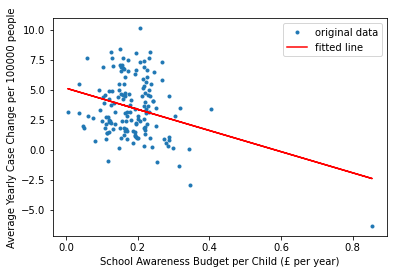

y = -8.819 x + 5.146
Rsq =  0.08968220841899815
p-value =  0.0001873652806396014


In [33]:
data2 = pd.read_csv('coursework_1_data_2019.csv')
data2['cases2008per100000'] = (data2['2008_cases_total']/data2['2008_pop_total'])*100000
data2['cases2013per100000'] = (data2['2013_cases_total']/data2['2013_pop_total'])*100000
data2['cases2018per100000'] = (data2['2018_cases_total']/data2['2018_pop_total'])*100000
data2['MeanPopulation'] = (data2['2008_pop_total']+data2['2013_pop_total']+data2['2018_pop_total'])/3
data2['averageyearlycasechange'] = (data2['cases2018per100000'] - data2['cases2008per100000'])/10


data2['budgetperperson'] = data2['total_budget']/data2['MeanPopulation']
data2['cleanairperperson'] = data2['clean_air']/data2['MeanPopulation']
data2['cleanenivroperperson'] = data2['clean_environ']/data2['MeanPopulation'] 
data2['healthtrainperperson'] = data2['health_training']/data2['MeanPopulation'] 
data2['schoolawarenessperperson'] = data2['school_awareness']/data2['MeanPopulation'] 
data2['mediaawarenessperperson'] = data2['media_awareness']/data2['MeanPopulation'] 
data2['subcounsellingperperson'] = data2['sub_counselling']/data2['MeanPopulation'] 

output_filename = 'Plot3.png'


filterd1 = data2[(data2["budgetperperson"] <5)]
x = filterd1['schoolawarenessperperson']
y = filterd1['averageyearlycasechange']
b = plt.plot(x,y,'.',label='original data')

plt.xlabel('School Awareness Budget per Child (£ per year)')
plt.ylabel('Average Yearly Case Change per 100000 people')

slope, intercept, r_value, p_value, std_err = sps.linregress(x, y) 
b = plt.plot(x, x*slope + intercept, 'r', label = 'fitted line')
plt.legend()
plt.savefig(output_filename)
plt.show()
print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)









Text(0.5, 1.05, 'Correlation Matrix')

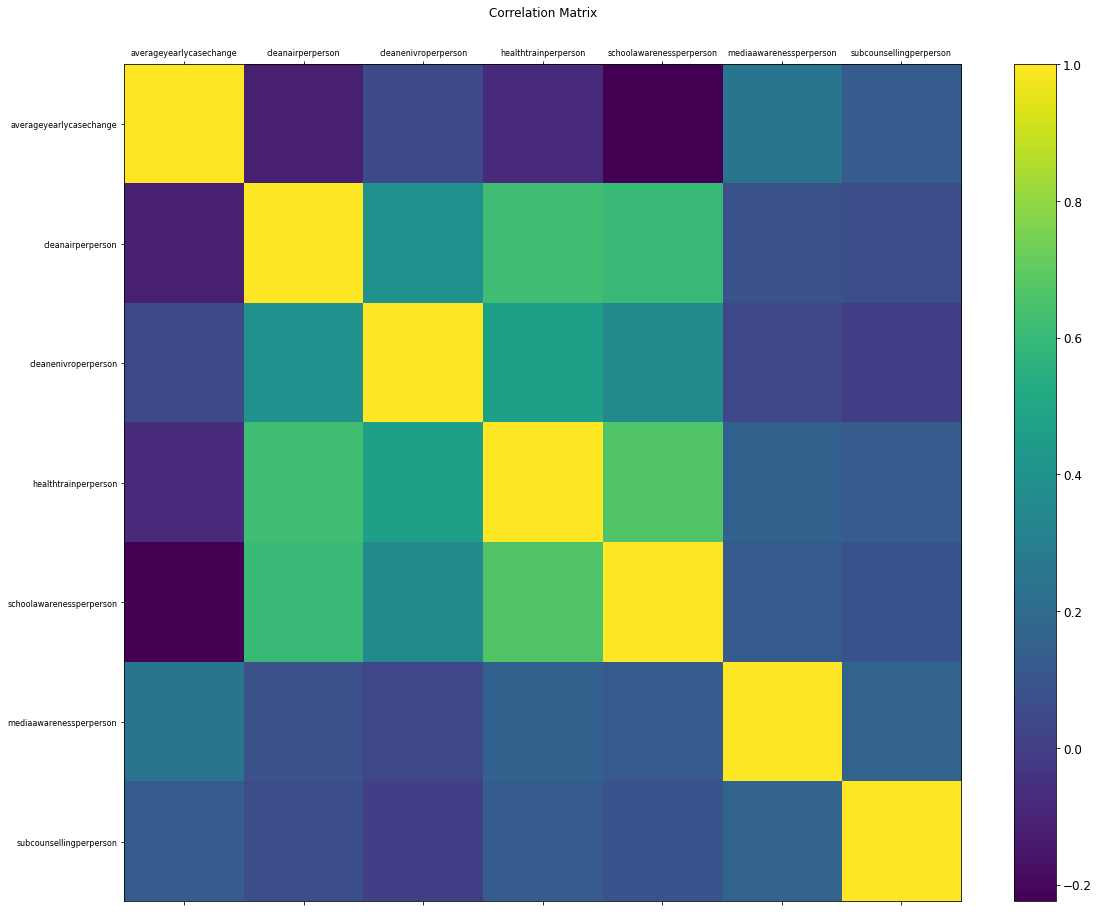

In [3]:
df= data2
a = df.drop(['local_authority_area','2008_cases_total','2013_cases_total','2018_cases_total',  '2008_pop_total',  '2013_pop_total',  '2018_pop_total'],axis=1)
a = a.drop(['2008_cases_male',  '2013_cases_male',  '2018_cases_male',  '2008_pop_male','2013_pop_male',  '2018_pop_male',  '2008_cases_female',  '2013_cases_female'],axis=1)
a = a.drop(['2018_cases_female',  '2008_pop_female',  '2013_pop_female',  '2018_pop_female','total_budget',  'clean_air',  'clean_environ',  'health_training',  'school_awareness'],axis=1)
a = a.drop(['budgetperperson','media_awareness','sub_counselling',  'region', 'local_authority_type','cases2008per100000',  'cases2013per100000',  'cases2018per100000','MeanPopulation'],axis=1)


df = a
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=8, rotation=0)
plt.yticks(range(df.shape[1]), df.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title('Correlation Matrix', fontsize=12)

In [4]:
print(df.head())
model_cnt_interven = sm.formula.ols('averageyearlycasechange ~ cleanairperperson + cleanenivroperperson + healthtrainperperson + schoolawarenessperperson + mediaawarenessperperson + subcounsellingperperson', df).fit()
model_cnt_interven.summary()

   averageyearlycasechange  cleanairperperson  cleanenivroperperson  \
0                 7.633863           0.118090              0.123713   
1                 5.883544           0.144168              0.049017   
2                 4.559458           0.168806              0.185275   
3                 0.563116           0.183017              0.232930   
4                 1.869075           0.224945              0.316138   

   healthtrainperperson  schoolawarenessperperson  mediaawarenessperperson  \
0              0.101220                  0.230556                 0.101220   
1              0.066317                  0.213369                 0.086501   
2              0.020586                  0.107048                 0.119399   
3              0.105373                  0.277298                 0.055460   
4              0.103353                  0.048637                 0.018239   

   subcounsellingperperson  
0                 0.106843  
1                 0.074967  
2                

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     averageyearlycasechange   R-squared:                       0.163
Model:                                 OLS   Adj. R-squared:                  0.128
Method:                      Least Squares   F-statistic:                     4.701
Date:                     Mon, 16 Nov 2020   Prob (F-statistic):           0.000211
Time:                             13:36:11   Log-Likelihood:                -342.14
No. Observations:                      152   AIC:                             698.3
Df Residuals:                          145   BIC:                             719.4
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.5524      0.719      2.160      0.032       0.132       2.973
cleanairperperson           -0.7927      2.354     -0.337      0.737      -5.446       3.861
cleanenivroperperson         3.8698      2.271      1.704      0.090      -0.618       8.358
healthtrainperperson         1.7346      5.272      0.329      0.743      -8.686      12.155
schoolawarenessperperson    -4.7057      1.560     -3.017      0.003      -7.789      -1.623
mediaawarenessperperson     15.6119      4.562      3.422      0.001       6.595      24.629
subcounsellingperperson     10.5502      7.439      1.418      0.158      -4.153      25.254
==============================================================================
Omnibus:                        2.061   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                1.952
Skew:                           0.193   Prob(JB):                        0.377
Kurtosis:                       2.601   Cond. No.                         41.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df



In [9]:
df_predictors_selected_VIF = drop_column_using_vif_(df.drop('averageyearlycasechange',axis=1))
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)
a1 = sm.OLS(endog=df[['averageyearlycasechange']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
a1.summary()

The columns remaining after VIF selection are:
Index(['cleanairperperson', 'cleanenivroperperson', 'healthtrainperperson',
       'schoolawarenessperperson', 'mediaawarenessperperson',
       'subcounsellingperperson'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     averageyearlycasechange   R-squared:                       0.163
Model:                                 OLS   Adj. R-squared:                  0.128
Method:                      Least Squares   F-statistic:                     4.701
Date:                     Mon, 16 Nov 2020   Prob (F-statistic):           0.000211
Time:                             13:38:02   Log-Likelihood:                -342.14
No. Observations:                      152   AIC:                             698.3
Df Residuals:                          145   BIC:                             719.4
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.5524      0.719      2.160      0.032       0.132       2.973
cleanairperperson           -0.7927      2.354     -0.337      0.737      -5.446       3.861
cleanenivroperperson         3.8698      2.271      1.704      0.090      -0.618       8.358
healthtrainperperson         1.7346      5.272      0.329      0.743      -8.686      12.155
schoolawarenessperperson    -4.7057      1.560     -3.017      0.003      -7.789      -1.623
mediaawarenessperperson     15.6119      4.562      3.422      0.001       6.595      24.629
subcounsellingperperson     10.5502      7.439      1.418      0.158      -4.153      25.254
==============================================================================
Omnibus:                        2.061   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                1.952
Skew:                           0.193   Prob(JB):                        0.377
Kurtosis:                       2.601   Cond. No.                         41.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

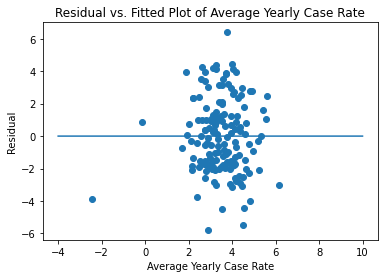

In [18]:
plt.scatter(a1.fittedvalues, a1.resid)
# adding title and labels
plt.xlabel('Average Yearly Case Rate')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of Average Yearly Case Rate')
t = np.arange(-4, 10, 0.01)
y = t*0
b = plt.plot(t, y, label = 'fitted line')
plt.show()

In [11]:
df_predictors_adding_random = df_predictors_selected_VIF
# using a seed to make the result reproducible
np.random.seed(420)

# adding 'totally_random', which is random noise and shows no relationship with the response variable
df_predictors_adding_random['totally_random'] = np.random.normal(0,5,df_predictors_adding_random.shape[0])
# the model without windspeed
a1_adding_random = sm.OLS(endog=df[['averageyearlycasechange']], exog=sm.add_constant(df_predictors_adding_random)).fit()
a1_adding_random.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     averageyearlycasechange   R-squared:                       0.168
Model:                                 OLS   Adj. R-squared:                  0.127
Method:                      Least Squares   F-statistic:                     4.147
Date:                     Mon, 16 Nov 2020   Prob (F-statistic):           0.000348
Time:                             13:39:35   Log-Likelihood:                -341.69
No. Observations:                      152   AIC:                             699.4
Df Residuals:                          144   BIC:                             723.6
Df Model:                                7                                         
Covariance Type:                 nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.5485      0.719      2.153      0.033       0.127       2.970
cleanairperperson           -0.5603      2.369     -0.237      0.813      -5.243       4.122
cleanenivroperperson         4.0685      2.282      1.783      0.077      -0.442       8.579
healthtrainperperson         1.4916      5.282      0.282      0.778      -8.948      11.931
schoolawarenessperperson    -5.0255      1.599     -3.144      0.002      -8.185      -1.866
mediaawarenessperperson     15.7862      4.568      3.456      0.001       6.756      24.816
subcounsellingperperson     10.1429      7.456      1.360      0.176      -4.594      24.880
totally_random              -0.0393      0.043     -0.925      0.357      -0.123       0.045
==============================================================================
Omnibus:                        2.373   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.305   Jarque-Bera (JB):                2.159
Skew:                           0.199   Prob(JB):                        0.340
Kurtosis:                       2.572   Cond. No.                         185.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df_predictors_adding_random = df_predictors_selected_VIF
# using a seed to make the result reproducible
np.random.seed(420)

# adding 'totally_random', which is random noise and shows no relationship with the response variable
df_predictors_adding_random['totally_random'] = np.random.normal(0,5,df_predictors_adding_random.shape[0])
# the model without windspeed
a1_adding_random = sm.OLS(endog=a1[['cnt']], exog=sm.add_constant(df_predictors_adding_random)).fit()
a1_adding_random.summary()

In [ ]:
filterd1 = d1[(d1["budgetper100000"] <500000)]
x = filterd1['budgetper100000']
y = filterd1['averageyearlymalecasechange']
b = plt.plot(x,y,'.',label='original data')

slope, intercept, r_value, p_value, std_err = sps.linregress(x, y) 
b = plt.plot(x, x*slope + intercept, 'r', label = 'fitted line')

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

In [ ]:
filterd1 = d1[(d1["budgetper100000"] <500000)]
x = filterd1['budgetper100000']
y = filterd1['averageyearlyfemalecasechange']
b = plt.plot(x,y,'.',label='original data')

slope, intercept, r_value, p_value, std_err = sps.linregress(x, y) 
b = plt.plot(x, x*slope + intercept, 'r', label = 'fitted line')

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

In [ ]:
output_filename = 'Plot1.png'

filterd1 = d1[(d1["budgetper100000"] <500000)]
x = filterd1['budgetperperson']
y = filterd1['averageyearlycasechange']
a = plt.plot(x,y,'.',label='original data')


plt.xlabel('Overall Budget per Child (£ per year)')
plt.ylabel('Average Yearly Case Change per 100000 people')



slope, intercept, r_value, p_value, std_err = sps.linregress(x, y) 
b = plt.plot(x, x*slope + intercept, 'r', label = 'fitted line')
plt.legend()
plt.savefig(output_filename)
plt.show()



print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

In [ ]:
fig = plt.figure()

plt.subplot(1, 6, 1)
plt.scatter(d1['cleanairper100000'],d1['averageyearlycasechange'])

plt.subplot(1, 6, 2)
plt.scatter(d1['cleanenivroper100000'],d1['averageyearlycasechange'])

plt.subplot(1, 6, 3)
plt.scatter(d1['healthtrainper10000'],d1['averageyearlycasechange'])

plt.subplot(1, 6, 4)
plt.scatter(d1['schoolawarenessper100000'],d1['averageyearlycasechange'])

plt.subplot(1, 6, 5)
plt.scatter(d1['mediaawarenessper100000'],d1['averageyearlycasechange'])

plt.subplot(1, 6, 6)
plt.scatter(d1['subcounsellingper100000'],d1['averageyearlycasechange'])


plt.show()

filterd1 = d1[(d1["budgetper100000"] <500000)]
x = filterd1['cleanairper100000']
y = filterd1['averageyearlycasechange']
b = plt.plot(x,y,'.',label='original data')

slope, intercept, r_value, p_value, std_err = sps.linregress(x, y) 
b = plt.plot(x, x*slope + intercept, 'r', label = 'fitted line')

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

filterd1 = d1[(d1["budgetper100000"] <500000)]
x = filterd1['cleanenivroper100000']
y = filterd1['averageyearlycasechange']
b = plt.plot(x,y,'.',label='original data')

slope, intercept, r_value, p_value, std_err = sps.linregress(x, y) 
b = plt.plot(x, x*slope + intercept, 'r', label = 'fitted line')

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

filterd1 = d1[(d1["budgetper100000"] <500000)]
x = filterd1['healthtrainper10000']
y = filterd1['averageyearlycasechange']
b = plt.plot(x,y,'.',label='original data')

slope, intercept, r_value, p_value, std_err = sps.linregress(x, y) 
b = plt.plot(x, x*slope + intercept, 'r', label = 'fitted line')

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

filterd1 = d1[(d1["budgetper100000"] <500000)]
x = filterd1['schoolawarenessper100000']
y = filterd1['averageyearlycasechange']
b = plt.plot(x,y,'.',label='original data')

slope, intercept, r_value, p_value, std_err = sps.linregress(x, y) 
b = plt.plot(x, x*slope + intercept, 'r', label = 'fitted line')

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)





In [ ]:
fig = plt.figure()

plt.subplot(2, 3, 1)
plt.scatter(d1['cleanairpercentage'],d1['averageyearlycasechange'])

plt.subplot(2, 3, 2)
plt.scatter(d1['cleanenvirpercentage'],d1['averageyearlycasechange'])

plt.subplot(2, 3, 3)
plt.scatter(d1['healthtrainingpercentage'],d1['averageyearlycasechange'])

plt.subplot(2, 3, 4)
plt.scatter(d1['schoolawarenesspercentage'],d1['averageyearlycasechange'])

plt.subplot(2, 3, 5)
plt.scatter(d1['mediaawarenesspercentage'],d1['averageyearlycasechange'])

plt.subplot(2, 3, 6)
plt.scatter(d1['subcounsellingpercentage'],d1['averageyearlycasechange'])


plt.show()

In [ ]:
df= d1
a = df.drop(['local_authority_area','2008_cases_total','2013_cases_total','2018_cases_total',  '2008_pop_total',  '2013_pop_total',  '2018_pop_total'],axis=1)
a = a.drop(['2008_cases_male',  '2013_cases_male',  '2018_cases_male',  '2008_pop_male','2013_pop_male',  '2018_pop_male',  '2008_cases_female',  '2013_cases_female'],axis=1)
a = a.drop(['2018_cases_female',  '2008_pop_female',  '2013_pop_female',  '2018_pop_female','total_budget',  'clean_air',  'clean_environ',  'health_training',  'school_awareness'],axis=1)
a = a.drop(['media_awareness','sub_counselling',  'region', 'local_authority_type','cases2008per100000',  'cases2013per100000',  'cases2018per100000'],axis=1)
a = a.drop(['overallcaseschange','Percentagecasechange','overallpopchange','Percentagepopchange',  'logpopchange',  'logcasechange',  'MeanPopulation'],axis=1)
a = a.drop(['budgetperperson','averagemalepop','malecases2008per100000','malecases2013per100000','malecases2018per100000','averageyearlymalecasechange','averagefemalepop','femalecases2008per100000'], axis=1)
a=a.drop(['budgetper100000','femalecases2013per100000','femalecases2018per100000','averageyearlyfemalecasechange','cleanairpercentage','cleanenvirpercentage','healthtrainingpercentage','schoolawarenesspercentage','mediaawarenesspercentage','subcounsellingpercentage'],axis=1)
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(a.corr(), fignum=f.number)
plt.xticks(range(a.shape[1]), a.columns, fontsize=14, rotation=45)
plt.yticks(range(a.shape[1]), a.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
print(a)
model_cnt_budget = sm.formula.ols('averageyearlycasechange ~ cleanairper100000 + cleanenivroper100000 + healthtrainper10000 + schoolawarenessper100000 + mediaawarenessper100000 + subcounsellingper100000', a).fit()
model_cnt_budget.summary()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df
print(a)
b = drop_column_using_vif_(a.drop('averageyearlycasechange',axis=1), thresh=5)
b.columns
model = sm.OLS(endog=a[['averageyearlycasechange']], exog=sm.add_constant(b)).fit()
model.summary()


plt.scatter(model.fittedvalues, model.resid)
# adding title and labels
plt.xlabel('Fitted bike rental')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of bike rental')
plt.show()

fig1 = plt.figure(figsize=(12,8))
fig2 = plt.figure(figsize=(12,8))
fig3 = plt.figure(figsize=(12,8))
fig4 = plt.figure(figsize=(12,8))
fig5 = plt.figure(figsize=(12,8))
fig6 = plt.figure(figsize=(12,8))






fig = sm.graphics.plot_regress_exog(model, 'cleanairper100000', fig=fig1)
fig = sm.graphics.plot_regress_exog(model, 'cleanenivroper100000', fig=fig2)
fig = sm.graphics.plot_regress_exog(model, 'healthtrainper10000', fig=fig3)
fig = sm.graphics.plot_regress_exog(model, 'schoolawarenessper100000', fig=fig4)
fig = sm.graphics.plot_regress_exog(model, 'mediaawarenessper100000', fig=fig5)
fig = sm.graphics.plot_regress_exog(model, 'subcounsellingper100000', fig=fig6)






In [ ]:
x = (d1['Percentagepopchange'])
y = (d1['Percentagecasechange'])
filter1 = d1[(d1["Percentagecasechange"] >40)]
print(filter1['local_authority_area'])
a = plt.plot(x,y,'.',label='original data')

In [ ]:
x = (d1['MeanPopulation'])
y = (d1['Percentagecasechange'])
a = plt.plot(x,y,'.',label='original data')

In [ ]:
#Population against budget per person
x = d1['MeanPopulation']
y = d1['budgetperperson']
print(np.mean(d1['budgetperperson']))
filter1 = d1[(d1["budgetperperson"] > 5)]
print(filter1['local_authority_area'])
print(np.mean(filter1['budgetperperson']))
#a = plt.plot(x,y,'.',label='original data')
b = plt.plot(x,y,'.',label='original data')

#City of London considerably outside the rest of the value, therefore can be considered an outlier. 


In [ ]:
#Population against case change per person
x = d1['MeanPopulation']
y = d1['overallcaseschange']
filter1 = d1[(d1['overallcaseschange'] < -20)]
print(filter1['local_authority_area'])
b = plt.plot(x,y,'.',label='original data')

In [ ]:
x = d1['MeanPopulation']
y = d1['averageyearlycasechange']
b = plt.plot(x,y,'.',label='original data')

In [ ]:
#Budget per person against yearly case change
x = d1['budgetperperson']
y = d1['averageyearlycasechange']
filter1 = d1[(d1['budgetperperson'] < 2)]
x = filter1['budgetperperson']
y = filter1['averageyearlycasechange']
b = plt.plot(x,y,'.',label='original data')

In [ ]:
#Budget per person against male yearly case change
x = d1['budgetperperson']
y = d1['averageyearlymalecasechange']
filter1 = d1[(d1['budgetperperson'] < 2)]
x = filter1['budgetperperson']
y = filter1['averageyearlymalecasechange']
b = plt.plot(x,y,'.',label='original data')

In [ ]:
#Budget per person against female yearly case change
x = d1['budgetperperson']
y = d1['averageyearlyfemalecasechange']
filter1 = d1[(d1['budgetperperson'] < 2)]
x = filter1['budgetperperson']
y = filter1['averageyearlyfemalecasechange']
b = plt.plot(x,y,'.',label='original data')

In [ ]:
x = d1['averagefemalepop']
y = d1['averageyearlyfemalecasechange']
b = plt.plot(x,y,'.',label='original data')

In [ ]:
x = d1['averagemalepop']
y = d1['averageyearlymalecasechange']
b = plt.plot(x,y,'.',label='original data')

In [ ]:
d1_filtered = d1[(d1["overallcaseschange"] > -25)]
#d1_filtered = d1[(d1["overallcaseschange"] < 100)]
x = d1_filtered['overallpopchange']
y = d1_filtered['overallcaseschange']
a = plt.plot((x),y,'.',label='original data')
slope, intercept, r_value, p_value, std_err = sps.linregress(x, y)
b = plt.plot(x, x*slope + intercept, 'r', label = 'fitted line')
print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

In [ ]:
x = d1['budgetper100000']
y = d1['overallcaseschange']
d1_filtered = d1[(d1["budgetper100000"] < 100000) & (d1["overallcaseschange"] > 0)]
x = d1_filtered['budgetper100000']
y = d1_filtered['overallcaseschange']
a = plt.plot((x),y,'.',label='original data')
slope, intercept, r_value, p_value, std_err = sps.linregress(x, y)
b = plt.plot(x, x*slope + intercept, 'r', label = 'fitted line')
print(d1.head())
plt.show()
print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)